In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading Data Frame
df = pd.read_csv(r"C:\Users\SHIVARJUN\Downloads\data_daily.csv")
#renaming Date column
df.rename(columns={'# Date':'Date'}, inplace=True)
#converting Date column to datetime
df['Date']=pd.to_datetime(df['Date'])
#assigning date column to index
df.set_index('Date', inplace = True)
#taking first order difference of the Receipt_Count column and adding it to DF
df['first_order'] = df['Receipt_Count'].diff()
#log transformation of Receipt_Count
df['log_transformation'] = np.log(df['Receipt_Count'])
#taking first order difference of the log transformation and adding it to the DF
df['log_first_order'] = df['log_transformation'].diff()
#dropping the Na or inf values from DF
df.dropna(inplace=True)

In [3]:
#Data Frame after transformations
df

,Receipt_Count,first_order,log_transformation,log_first_order
Date,,,,
2021-01-02,7455524,-109242.0,15.824466,-0.014546
2021-01-03,7095414,-360110.0,15.774959,-0.049507
2021-01-04,7666163,570749.0,15.852327,0.077368
2021-01-05,7771289,105126.0,15.865947,0.013620
2021-01-06,7473320,-297969.0,15.826850,-0.039097
...,...,...,...,...
2021-12-27,10350408,-388457.0,16.152536,-0.036843
2021-12-28,10219445,-130963.0,16.139803,-0.012734
2021-12-29,10313337,93892.0,16.148948,0.009146


In [4]:
def rolling_mean_variance(df:pd.Series):
    #plotting without using scientific notations
    plt.ticklabel_format(style='plain')
    #plotting input df column values
    plt.plot(df)
    #calculating the rolling mean of the input df column values
    #we are using 30 because we have 30 days in a month
    rolmean = df.rolling(window=30).mean()
    #calculating the rolling variance of the input df column values
    rolstd = df.rolling(window=30).std()
    #plotting the rolling mean
    plt.plot(rolmean, color='red', label='Rolling Mean')
    #plotting the rolling variance
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')

In [5]:
def rolling_mean(df:pd.Series):
    #plotting without using scientific notations in plot
    plt.ticklabel_format(style='plain')
    #plotting input df column values
    plt.plot(df)
    #calculating the rolling mean of the input df column values
    rolmean = df.rolling(window=30).mean()
    #plotting the rolling mean
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')

In [6]:
def rolling_std(df:pd.Series):
    #plotting without using scientific notations
    plt.ticklabel_format(style='plain')
    #plotting input df column values
    plt.plot(df)
    #calculating the rolling variance of the input df column values
    rolstd = df.rolling(window=30).std()
    #plotting the rolling variance
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')

# Transformations

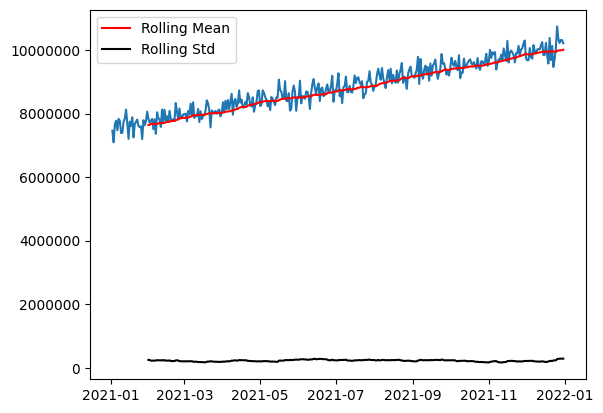

In [7]:
#upward trend with mean increasing and variance is constant
#clearly indicating time series is not stationary
rolling_mean_variance(df['Receipt_Count'])

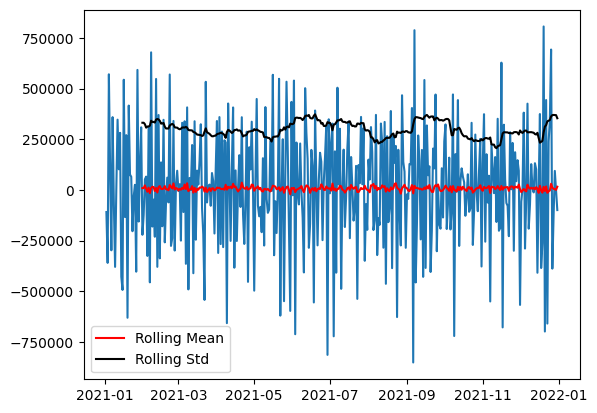

In [8]:
#mean and variance is constant
#clearly indicating time series is stationary after transformation
rolling_mean_variance(df['first_order'])

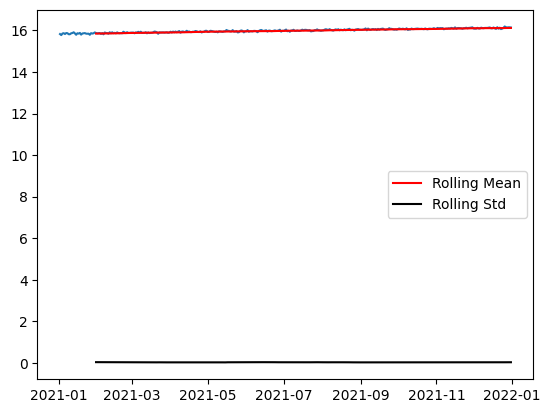

In [9]:
#looks like mean and variance is constant but we are not sure we should plot them seperately
rolling_mean_variance(df['log_transformation'])

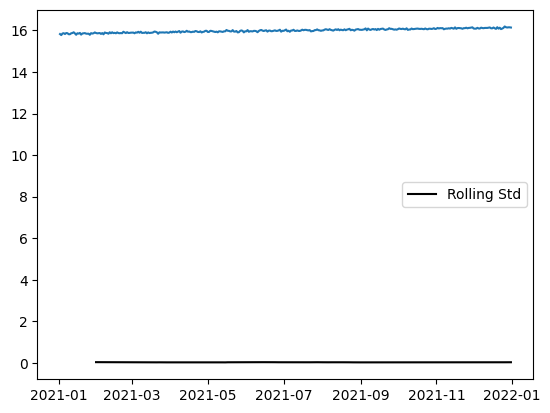

In [10]:
# we can see that there is no change in standard deviation
#still unable confirm its stationary
rolling_std(df['log_transformation'])

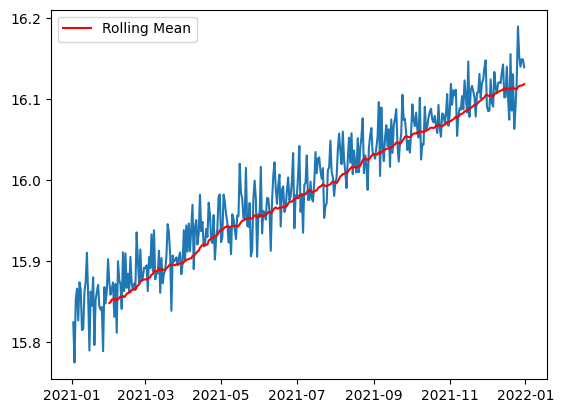

In [11]:
# we can see that mean is increasing with variance so its not stationary
rolling_mean(df['log_transformation'])

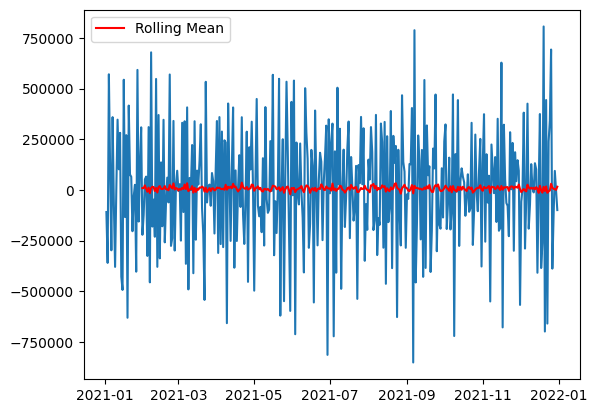

In [12]:
#upward trend with mean increasing and variance is constant
#clearly indicating time series is n0t stationary
rolling_mean(df['first_order'])

In [13]:
#we can go with the Log first order and first differenece as they are stationary

# Train and Test Data

In [14]:
##Splitting data to develop base line models 

In [15]:
#dividing data into test and train
train = df[:-30]
test = df[-30:]
len(train), len(test)

(334, 30)

# ADF TEST


In [16]:
##we confirm with ADF Test that time series are stationary

In [17]:
#null hypothesis: Time series Data is Stationary
#alternate hypothesis: Time series Data is not Stationary
#test statistcs is less than critical value we cans say that time series is stationary
def ADF_Test(df):
    df.dropna()
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    if dftest[0] < dftest[4]['5%']:
        print('reject null hypothesis: Time series Data is Stationary \n')
    else:
        print('failed to reject null hypothesis: Time series Data is not Stationary')
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [18]:
#confirming that Receipt_Count time series is not stationary
ADF_Test(df['Receipt_Count'])

failed to reject null hypothesis: Time series Data is not Stationary
Test Statistic                   0.002471
p-value                          0.958736
#Lags Used                      17.000000
Number of Observations Used    346.000000
Critical Value (1%)             -3.449392
Critical Value (5%)             -2.869930
Critical Value (10%)            -2.571240
dtype: float64


In [19]:
#confirming that after transformation(first order) time series is stationary
ADF_Test(df['first_order'])

reject null hypothesis: Time series Data is Stationary 

Test Statistic                -8.889819e+00
p-value                        1.251287e-14
#Lags Used                     1.700000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64


In [20]:
#confirming that after transformation(log_transformation) time series is not stationary
#since this is not stationary we take the first order derivate of this to get stationary series
ADF_Test(df['log_transformation'])

failed to reject null hypothesis: Time series Data is not Stationary
Test Statistic                  -0.636109
p-value                          0.862612
#Lags Used                      17.000000
Number of Observations Used    346.000000
Critical Value (1%)             -3.449392
Critical Value (5%)             -2.869930
Critical Value (10%)            -2.571240
dtype: float64


In [21]:
#confirming that after transformation(log_first_order) time series is stationary
ADF_Test(df['log_first_order'])

reject null hypothesis: Time series Data is Stationary 

Test Statistic                -8.681140e+00
p-value                        4.282880e-14
#Lags Used                     1.700000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64


In [22]:
#Baseline Models for First_order reference
#Baseline model - 1 uses historic mean
#historic mean after transormation of original data
test['historic_mean_first_order'] = np.mean(train['first_order'])
#Baseline model - 2: uses last observed value
#using last value of the transormed data
test['last_value_first_order'] = train['first_order'][-1]
#Baseline model - 3: uses last 30 values
#using the last 30 values of the transformed data
test['naive_first_order'] = train['first_order'][-30:].values

In [23]:
#Baseline Models for log First_order reference
#Baseline model - 1 uses historic mean
test['historic_mean_of_log_first_order'] = np.mean(train['log_first_order'])
#Baseline model - 2: uses last observed value
#using last value of the transormed data
test['last_value_of_log_first_order'] = train['log_first_order'][-1]
#Baseline model - 3: uses last 30 values
#using the last 30 values of the transformed data
test['naive_log_first_order'] = train['log_first_order'][-30:].values

In [24]:
#looking at the test set after adding new columns
test.head()

,Receipt_Count,first_order,log_transformation,log_first_order,historic_mean_first_order,last_value_first_order,naive_first_order,historic_mean_of_log_first_order,last_value_of_log_first_order,naive_log_first_order
Date,,,,,,,,,,
2021-12-02,9674146,-57481.0,16.084968,-0.005924,6487.607784,-567590.0,373755.0,0.000754,-0.056687,0.038073
2021-12-03,9679469,5323.0,16.085518,0.000550,6487.607784,-567590.0,-255408.0,0.000754,-0.056687,-0.025860
2021-12-04,10060861,381392.0,16.124163,0.038646,6487.607784,-567590.0,176210.0,0.000754,-0.056687,0.017912
2021-12-05,9771507,-289354.0,16.094981,-0.029182,6487.607784,-567590.0,-62369.0,0.000754,-0.056687,-0.006303
2021-12-06,9726983,-44524.0,16.090414,-0.004567,6487.607784,-567590.0,70097.0,0.000754,-0.056687,0.007082


In [25]:
#Mean Squared Error of Base line model-1
mse_mean_historic_first = mean_squared_error(test['first_order'], test['historic_mean_first_order'])
mse_mean_historic_first

121143848112.02449

In [26]:
#Mean Squared Error of Base line model-2
mse_mean_last_value_first = mean_squared_error(test['first_order'],test['last_value_first_order'])
mse_mean_last_value_first

461613810996.5333

In [27]:
#Mean Squared Error of Base line model-3
mse_mean_naive_first = mean_squared_error(test['first_order'],test['naive_first_order'])
mse_mean_naive_first

266547739616.36667

In [28]:
#Mean Squared Error of Base line model-1
mse_mean_historic_log = mean_squared_error(test['log_first_order'],test['historic_mean_of_log_first_order'])
mse_mean_historic_log

0.0012073069105358984

In [29]:
#Mean Squared Error of Base line model-2
mse_mean_last_value_log = mean_squared_error(test['log_first_order'],test['last_value_of_log_first_order'])
mse_mean_last_value_log

0.004604333273554265

In [30]:
#Mean Squared Error of Base line model-3
mse_mean_naive_log = mean_squared_error(test['log_first_order'],test['naive_log_first_order'])
mse_mean_naive_log

0.0026932429887148346

In [31]:
#looking Mean Squared Errors and comparing between them 
#we can confirm that log_first_order is more better than first order
df_MSE = pd.DataFrame({'Mean_Squared_Error_first_order':[mse_mean_historic_first,mse_mean_last_value_first,mse_mean_naive_first] , 
                      'Mean_Squared_Error_log_first_order':[mse_mean_historic_log,mse_mean_last_value_log,mse_mean_naive_log]},
                     index = ['Historic_Mean', 'Last_known_value', 'Naive'])
df_MSE

,Mean_Squared_Error_first_order,Mean_Squared_Error_log_first_order
Historic_Mean,1.211438e+11,0.001207
Last_known_value,4.616138e+11,0.004604
Naive,2.665477e+11,0.002693


# ACF Plots


In [32]:
#we use this plot to check if the stationary series are afftected by autocorrelation as we increase lag values
#If the data is stationary and its not afftected by autocorrelation as we increase lag values we assume that they are random walk models and we can use #any of base line models since they are random no statistical techniques helps us to predict

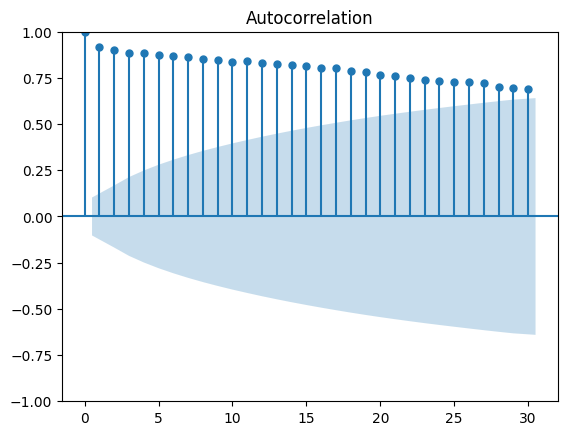

In [33]:
# Autocorrelated plot for the original data
#we can confirm from the plot that data is not stationary
plot_acf(df['Receipt_Count'], lags=30); 

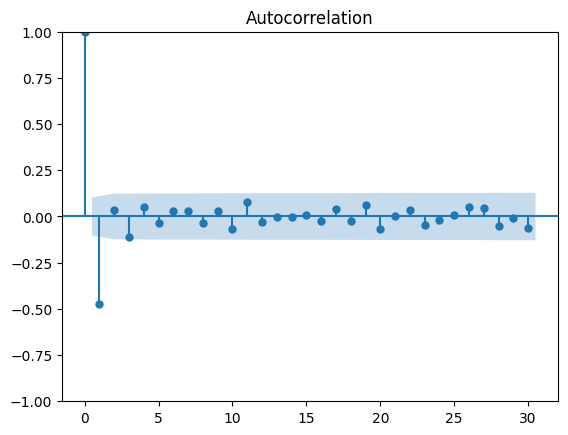

In [34]:
#autocorrelated plot for the first order of data
#from plot we can confirm that data is stationary
plot_acf(df['first_order'], lags=30); 

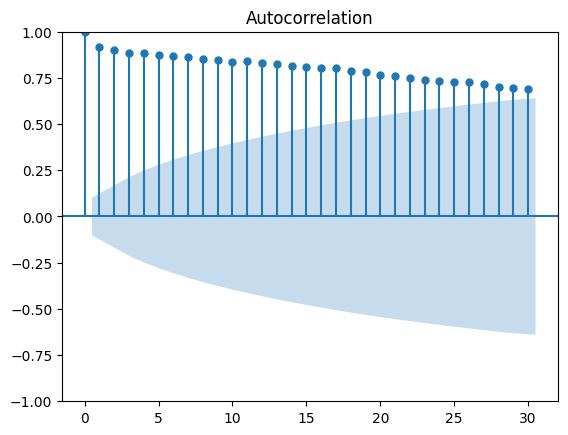

In [35]:
#autocorrelated plot for the log transformation of original data
#from plot we can confirm that data is not stationary
plot_acf(df['log_transformation'], lags=30); 

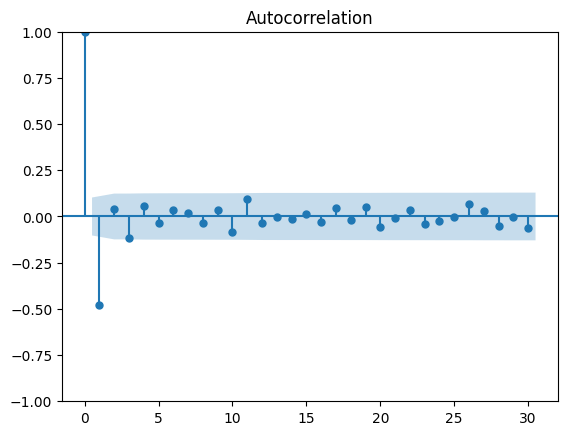

In [36]:
#from plots of autocorrelated for log first order and first order
#since auto correlation coefficients are not affected by changing the lag we can
#confirming its purely random and we can only use naive forecasting methods or baselines
plot_acf(df['log_first_order'], lags=30); 

In [37]:
len(test), len(train)

(30, 334)

In [40]:
#after analysis we found out that series is random and we cannot use any statistical techniques I have decided to go with the Base line Model -1 of the Log first order. I also decided to make a new model that is used to make a stationary random time series as our log first order is statioanary. the formula is 
#y_present = C + aplha*Y_past + E(error which follows distribution which has mean 0 and std of 1)
#for a series to be stationary is is necessary for aplha to be in between (-1,1)
#to make things simple i have used constant(C) value as log transformation mean because log first order is the first derivate of log transformation if we add the mean of the log transformation it can be transformed back to its previous form and if we inverse it we get the prediction value.
#I have used y_past value as mean of log first order and randomly genreated E values with mean 0 and standard deviation of 1.'''

In [41]:
def Prediction():
    #generating random numbers with mean 0 and std 1
    np.random.seed(42)
    E = np.random.normal(0, 1, 12)            
    E.sort()
    while True:
        print("Enter the month (1-12) to predict for 2022")
        print("(or)")
        print("'Q' to Quit:")
        #taking prediction month from user
        user_input = input()
        if user_input.upper() == 'Q' or user_input.lower() == 'q':
            break
        try:
            user_input = int(user_input)
            if user_input < 1 or user_input > 12:
                print('enter a valid month number')
                continue
        except ValueError:
            print("Please enter a valid month number or 'Q' to Quit")
            continue
        
        #method -1
        #genrating Hsitoric mean
        Historic_mean = np.exp(df['log_transformation'].mean() + df['log_first_order'].mean())
        
        #method-2
        #calculating constant value
        C = df['log_first_order'].mean()
        #calculating pre value which is the mean of log_transformation
        pre = df['log_transformation'].mean()
        #setting aplha value to 0.9
        Aplha = 0.9
        #list to add genereated values
        pred = []
        for i in range(12):
            #formula which generetes the predicted values which is stationary and randomized
            value = C  + Aplha*pre + E[i]
            rounded_value = round(value, 6)
            #applying inveres logarithm
            inverse = np.exp(rounded_value)
            pred.append(inverse)
        #printing predicted values
        print(f'predicted value using method - 1 for {user_input}/2022 is {int(pred[user_input - 1])}')
        print(f'predicted value using method - 2 for {user_input}/2022 is {int(Historic_mean)}')
        print()

In [43]:
Prediction()

Enter the month (1-12) to predict for 2022
(or)
'Q' to Quit:
predicted value using method - 1 for 1/2022 is 1112507
predicted value using method - 2 for 1/2022 is 8802763

Enter the month (1-12) to predict for 2022
(or)
'Q' to Quit:
